In [1]:
# Adapted from YouHan Lee: https://www.kaggle.com/youhanlee/extensive-eda-for-application-and-bureau-data

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from scipy.stats import gaussian_kde

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import random

import warnings
warnings.filterwarnings("ignore")

Contents
- <a href='#1'>1. Read dataset</a>
    - <a href='#1_1'>1.1. Read dataset</a>
    - <a href='#1_2'>1.2. Check null data</a>
    - <a href='#1_2'>1.3. Make meta dataframe</a>
- <a href='#2'>2. EDA - application train</a>
    - <a href='#2_1'>2.1. Object feature</a>
        - <a href='#2_1_1'>2.1.1 Contract type</a>
        - <a href='#2_1_2'>2.1.2. Gender</a>
        - <a href='#2_1_3'>2.1.3. Do you have an own car?</a>
        - <a href='#2_1_4'>2.1.4. Do you have own realty?</a>
        - <a href='#2_1_5'>2.1.5. Suite type</a>
        - <a href='#2_1_6'>2.1.6. Income type</a>
        - <a href='#2_1_7'>2.1.7 Contract type </a>
        - <a href='#2_1_8'>2.1.8. 2.8 Family status</a>
        - <a href='#2_1_9'>2.1.9. Housing type</a>
        - <a href='#2_1_10'>2.1.10. Occupation type</a>
        - <a href='#2_1_11'>2.1.11. Process start (weekday)</a>
        - <a href='#2_1_12'>2.1.12. Organization type</a>
        - <a href='#2_1_13'>2.1.13. FONDKAPREMONT </a>
        - <a href='#2_1_14'>2.1.14. House type</a>
        - <a href='#2_1_15'>2.1.15. Wall material</a>
        - <a href='#2_1_16'>2.1.16. Emergency</a>
    - <a href='#2_2'>2.2. Int feature</a>
        - <a href='#2_2_1'>2.2.1 Count of children</a>
        - <a href='#2_2_2'>2.2.2. Mobil</a>
        - <a href='#2_2_3'>2.2.3. EMP Phone</a>
        - <a href='#2_2_4'>2.2.4. Work phone</a>
        - <a href='#2_2_5'>2.2.5. Cont mobile</a>
        - <a href='#2_2_6'>2.2.6. Phone</a>
        - <a href='#2_2_7'>2.2.7 Region Rating Client</a>
        - <a href='#2_2_8'>2.2.8. Region Rating Client With City</a>
        - <a href='#2_2_9'>2.2.9. Hour Appr Process Start</a>
        - <a href='#2_2_10'>2.2.10. Register region and not live region</a>
        - <a href='#2_2_11'>2.2.11. Register region and not work region</a>
        - <a href='#2_2_12'>2.2.12. Live region and not work region</a>
        - <a href='#2_2_13'>2.2.13. Register city and not live city</a>
        - <a href='#2_2_14'>2.2.14. Register city and not work city</a>
        - <a href='#2_2_15'>2.2.15. Live city and not work city</a>
        - <a href='#2_2_16'>2.2.16. Heatmap for int features</a>
        - <a href='#2_2_17'>2.2.17. More analysis for int features which have correlation with target</a>
        - <a href='#2_2_18'>2.2.18. linear regression analysis on the high correlated feature combinations</a> 

# <a id='1'>1. Read dataset</a>

## <a id='1_1'>1.1. Read dataset</a>

In [2]:
#Import data
application_train = pd.read_csv('input/application_train.csv')
application_test = pd.read_csv('input/application_test.csv')
previous_application = pd.read_csv('input/previous_application.csv')
bureau_data = pd.read_csv('input/bureau.csv')
bureau_balance = pd.read_csv('input/bureau_balance.csv')
credit_card_balance = pd.read_csv('input/credit_card_balance.csv')
POS_CASH_balance  = pd.read_csv('input/POS_CASH_balance.csv')
installments_payments = pd.read_csv('input/installments_payments.csv')

In [3]:
print('Size of training_data', application_train.shape)
print('Size of testing_data', application_test.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of bureau data', bureau_data.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of POS_CASH_bal data', POS_CASH_balance.shape)
print('Size of installments_payments data', installments_payments.shape)

Size of training_data (307511, 122)
Size of testing_data (48744, 121)
Size of previous_application data (677118, 37)
Size of bureau data (1672556, 17)
Size of bureau_balance data (12045693, 3)
Size of credit_card_balance data (1503945, 23)
Size of POS_CASH_bal data (4189951, 8)
Size of installments_payments data (3117014, 8)


### Preview Data

In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131.0,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20.0,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16.0,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16.0,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21.0,NaN


In [7]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0.0,C
1,5715448,-1.0,C
2,5715448,-2.0,C
3,5715448,-3.0,C
4,5715448,-4.0,C


In [8]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1.0,0.0,1.0,35.0,Active,0.0,0.0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1.0,0.0,0.0,69.0,Active,0.0,0.0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0.0,0.0,0.0,30.0,Active,0.0,0.0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1.0,0.0,0.0,10.0,Active,0.0,0.0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1.0,0.0,1.0,101.0,Active,0.0,0.0


In [9]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943.0,-31.0,48.0,45.0,Active,0.0,0.0
1,1715348,367990.0,-33.0,36.0,35.0,Active,0.0,0.0
2,1784872,397406.0,-32.0,12.0,9.0,Active,0.0,0.0
3,1903291,269225.0,-35.0,48.0,42.0,Active,0.0,0.0
4,2341044,334279.0,-35.0,36.0,35.0,Active,0.0,0.0


In [10]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## <a id='1_2'>1.2. Check For Missing Data</a>

#### Check for missing data in application_train

In [11]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


#### Check for missing data in prev_application

In [12]:
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,674699,99.642751
RATE_INTEREST_PRIMARY,674699,99.642751
RATE_DOWN_PAYMENT,358236,52.905993
AMT_DOWN_PAYMENT,358236,52.905993
NAME_TYPE_SUITE,332194,49.059987
DAYS_TERMINATION,269881,39.857307
NFLAG_INSURED_ON_APPROVAL,269881,39.857307
DAYS_FIRST_DRAWING,269881,39.857307
DAYS_FIRST_DUE,269881,39.857307
DAYS_LAST_DUE_1ST_VERSION,269881,39.857307


#### Check for missing data in bureau_data

In [13]:
total = bureau_data.isnull().sum().sort_values(ascending = False)
percent = (bureau_data.isnull().sum()/bureau_data.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

,Total,Percent
AMT_ANNUITY,1192385,71.291185
AMT_CREDIT_MAX_OVERDUE,1096308,65.546864
DAYS_ENDDATE_FACT,618559,36.982857
AMT_CREDIT_SUM_LIMIT,577120,34.505272
AMT_CREDIT_SUM_DEBT,250960,15.004580
DAYS_CREDIT_ENDDATE,103128,6.165892
AMT_CREDIT_SUM,13,0.000777
CREDIT_TYPE,1,0.000060


#### Check for missing data in bureau_balance

In [14]:
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

,Total,Percent
STATUS,1,0.000008
MONTHS_BALANCE,1,0.000008
SK_ID_BUREAU,0,0.000000


#### Check for missing data in credit_card_balance

In [15]:
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

,Total,Percent
AMT_PAYMENT_CURRENT,309324,20.567507
CNT_DRAWINGS_POS_CURRENT,305199,20.293229
CNT_DRAWINGS_OTHER_CURRENT,305199,20.293229
CNT_DRAWINGS_ATM_CURRENT,305199,20.293229
AMT_DRAWINGS_ATM_CURRENT,305198,20.293162
AMT_DRAWINGS_OTHER_CURRENT,305198,20.293162
AMT_DRAWINGS_POS_CURRENT,305198,20.293162
CNT_INSTALMENT_MATURE_CUM,111663,7.424673
AMT_INST_MIN_REGULARITY,111662,7.424607
SK_DPD_DEF,1,0.000066


#### Check for missing data in POS_CASH_bal

In [16]:
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

,Total,Percent
CNT_INSTALMENT_FUTURE,6619,0.157973
CNT_INSTALMENT,6608,0.157711
SK_DPD_DEF,1,0.000024


#### Check for missing data in inst_payments

In [17]:
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

,Total,Percent
AMT_PAYMENT,1,0.000032
AMT_INSTALMENT,0,0.000000
DAYS_ENTRY_PAYMENT,0,0.000000


#### Check Datatypes

In [18]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Exterior Sources

The three variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`.
According to the documentation, these features represent a "normalized score from external data source", which is unclear but may be a cumulative sort of credit rating made using numerous sources of data. 

Below are the correlations of the `EXT_SOURCE` features with the target and with each other.

In [24]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


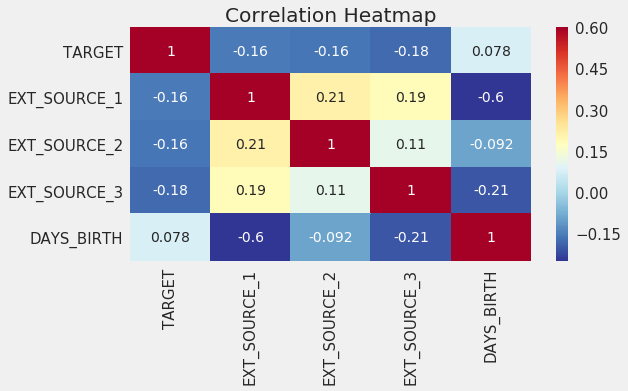

In [25]:
plt.figure(figsize = (8, 4))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three `EXT_SOURCE` featureshave negative correlations with the target, indicating that as the value of the `EXT_SOURCE` increases, the client is more likely to repay the loan. We can also see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.

`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong. In fact, they are all considered weak or very weak correlations:

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

For example, a correlation value of .46 would be a “moderate positive correlation”. However weak these variables are, they will still be useful for a model to predict whether or not an applicant will repay a loan on time.

#### Make meta dataframe

In [26]:
def make_meta_dataframe(df):
    data = []
    for col in df.columns:
        if col == 'TARGET':
            role = 'target'
        elif col == 'SK_ID_CURR':
            role = 'id'
        else:
            role = 'input'

        if df[col].dtype == 'float64':
            level = 'interval'
        elif df[col].dtype == 'int64':
            level = 'ordinal'
        elif df[col].dtype == 'object':
            level = 'categorical'

        col_dict = {
            'varname': col,
            'role': role,
            'level': level,
            'dtype': df[col].dtype,
            'response_rate': 100 * df[col].notnull().sum() / df.shape[0]
        }
        data.append(col_dict)

    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'dtype', 'response_rate'])
    meta.set_index('varname', inplace=True)
    return meta

In [27]:
meta = make_meta_dataframe(application_train)

In [28]:
meta.head()

,role,level,dtype,response_rate
varname,,,,
SK_ID_CURR,id,ordinal,int64,100.0
TARGET,target,ordinal,int64,100.0
NAME_CONTRACT_TYPE,input,categorical,object,100.0
CODE_GENDER,input,categorical,object,100.0
FLAG_OWN_CAR,input,categorical,object,100.0


## <a id='1_4'>1.4. Check imbalance of target</a>

- Checking the imbalance of dataset is important. If imbalanced, we need to select more technical strategy to make a model.

In [29]:
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [30]:
cnt_srs = application_train['TARGET'].value_counts()
text = ['{:.2f}%'.format(100 * (value / cnt_srs.sum())) for value in cnt_srs.values]

trace = go.Bar(
    x = cnt_srs.index,
    y = (cnt_srs / cnt_srs.sum()) * 100,
    marker = dict(
        color = random_color_generator(2),
        line = dict(color='rgb(8, 48, 107)',
                   width = 1.5
                   )
    ), 
    opacity = 0.7
)

data = [trace]

layout = go.Layout(
    title = 'Target distribution(%)',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Labels (0: repaid, 1: did not repay)'
    ),
    yaxis = dict(
        title = 'Account(%)'
    ),
    width=800,
    height=500
)
annotations = []
for i in range(2):
    annotations.append(dict(
        x = cnt_srs.index[i],
        y = ((cnt_srs / cnt_srs.sum()) * 100)[i],
        text = text[i],
        font = dict(
            family = 'Arial',
            size = 14,
        ),
        showarrow = True
    ))
    layout['annotations'] = annotations

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# <a id='2'>2. EDA - application_train </a>

## <a id='2_1'>2.1. Object feature</a>

- Use a two count bar plot for each object and int features. One contains the count of responses and other contains the percent on target.

In [31]:
def get_percent(df, temp_col, width=800, height=500):
    cnt_srs = df[[temp_col, 'TARGET']].groupby([temp_col], as_index=False).mean().sort_values(by=temp_col)

    trace = go.Bar(
        x = cnt_srs[temp_col].values[::-1],
        y = cnt_srs['TARGET'].values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        textfont = dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace
#     fig = go.Figure(data=data, layout=layout)
#     py.iplot(fig)


def get_count(df, temp_col, width=800, height=500):
    cnt_srs = df[temp_col].value_counts().sort_index()

    trace = go.Bar(
        x = cnt_srs.index[::-1],
        y = cnt_srs.values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        textfont = dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        name = 'Percent',
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace
#     fig = go.Figure(data=data, layout=layout)
#     py.iplot(fig)

In [32]:
def plot_count_percent_for_object(df, temp_col, height=500):
    trace1 = get_count(df, temp_col)
    trace2 = get_percent(df, temp_col)

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Count', 'Percent'), print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout']['yaxis1'].update(title='Count')
    fig['layout']['yaxis2'].update(range=[0, 1], title='% TARGET')
    fig['layout'].update(title='{} (Response rate: {:.2f}%)'.format(temp_col, meta[(meta.index == temp_col)]['response_rate'].values[0]), margin=dict(l=100), width=800, height=height, showlegend=False)

    py.iplot(fig)

In [33]:
features_dtype_object = meta[meta['dtype'] == 'object'].index
features_dtype_int = meta[meta['dtype'] == 'int64'].index
features_dtype_float = meta[meta['dtype'] == 'float64'].index

- Sometimes null data itself can be important feature. Comparing the change when using null data as feature and not using nulll data as feature can be useful.

In [34]:
application_object_na_filled = application_train[features_dtype_object].fillna('null')
application_object_na_filled['TARGET'] = application_train['TARGET']

### <a id='2_1_1'>2.1.1. Contract type</a>

In [35]:
temp_col = features_dtype_object[0]
plot_count_percent_for_object(application_train, temp_col)

- Most contract type of clients is Cash loans. 
- Not repayment rate is higher in cash loans (~8%) than in revolving loans(~5%).

### <a id='2_1_2'>2.1.2.  Gender of the client</a>

In [36]:
temp_col = features_dtype_object[1]
plot_count_percent_for_object(application_train, temp_col)

- The number of female clients is almoist double the number of male clients.
- Males have a higher chance of not returning their loans (~10%), comparing with women(~7%).

### <a id='2_1_3'>2.1.3. Do the client own a car?</a>

In [37]:
temp_col = features_dtype_object[2]
plot_count_percent_for_object(application_train, temp_col)

- The clients that owns a car are higher than no-car clients by a factor of two times. 
- The Not-repayment percent is similar. (Own: ~7%, Not-own: ~8%)

### <a id='2_1_4'>2.1.4. Does the client own realty?</a>

In [38]:
temp_col = features_dtype_object[3]
plot_count_percent_for_object(application_train, temp_col)

- T he clients that owns a realty almost a half of the ones that doesn't own realty. 
- Both categories have not-repayment rate, about ~8%.

### <a id='2_1_5'>2.1.5. Who accompanied client when applying for loan?</a>

In [39]:
temp_col = features_dtype_object[4]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- Most suite type of clients are 'Unaccompanied', followed by Family, Spouse, children.
- When considering null data, there is no change the order.
- Other_B and Other_A have higher not-repayment rate than others.

### <a id='2_1_6'>2.1.6. Income type</a>

In [40]:
temp_col = features_dtype_object[5]
plot_count_percent_for_object(application_train, temp_col)

- Most of the clients get income from working. 
- The number of Student, Unemployed, Bussnessman and Maternity leave are very few.
- When unemployed and maternity leave, there is  high probability of not-repayment.

### <a id='2_1_7'>2.1.7. Education type</a>

In [41]:
temp_col = features_dtype_object[6]
plot_count_percent_for_object(application_train, temp_col)

- Clients with secondary education type are most numerous, followed by higher education, incomplete higher.
- Clients with Lower secondary have the highest not-repayment rate(~10%).

### <a id='2_1_8'>2.1.8. Family status</a>

In [42]:
temp_col = features_dtype_object[7]
plot_count_percent_for_object(application_train, temp_col)

- Most of clients  for loans are married followed by single/not married, civial marriage.
- Civil marriage have almost 10% ratio of not returning loans followed by single/notmarried(9.9%), separate(8%).

### <a id='2_1_9'>2.1.9. Housing type</a>

In [43]:
temp_col = features_dtype_object[8]
plot_count_percent_for_object(application_train, temp_col)

- Clients with house/apartment are most numerous, followed by With parents, Municipal apartment.
- When Rented apartment and live with parents, clients have somewhat high not-repayment ratio. (~12%)


### <a id='2_1_10'>2.1.10. Occupation type</a>

In [44]:
temp_col = features_dtype_object[9]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- When not considering null data, Majority of clients are laborers, sales staff, core staff, drivers. But with considering null data, null data(I think it would be 'not want to repond' or 'no job', 'not in category') are most numerous.
- However, not-repayment rate is low for null data. Low-skill labor is the most high not-repayment rate (~17%) in both plot.

### <a id='2_1_11'>2.1.11. On which day of the week did the client apply for the loan?</a>

In [45]:
temp_col = features_dtype_object[10]
plot_count_percent_for_object(application_train, temp_col)

- The number of process for weekend is less than other days. That's because Weekend is weekend.
- There are no big changes between not-repayment rate of all days.
- Day is not important factor for repayment.

### <a id='2_1_12'>2.1.12. Type of organization where the client works</a>

In [46]:
temp_col = features_dtype_object[11]
plot_count_percent_for_object(application_train, temp_col)

- The most frequent case of organization is Bussiness Entity Type 3 followed XNA and self-employ.
- The Transport: type 3 has the highest not repayment rate(~16%), Industry: type 13(~13.5%).

### <a id='2_1_13'>2.1.13. FONDKAPREMONT: Normalized information about the building where the client lives</a>

In [47]:
temp_col = features_dtype_object[12]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

### <a id='2_1_14'>2.1.14. House type: Normalized information about the building where the client lives</a>

In [48]:
temp_col = features_dtype_object[13]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- When considering null data, null data and block of flats are two-top. 
- But, specific housing and terraced house have higher not-repayment rate than block of flats. 
- null data has the highest not-repayment rate(~9%).

### <a id='2_1_15'>2.1.15. Wall material: Normalized information about the building where the client lives</a>

In [49]:
temp_col = features_dtype_object[14]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- There are over 150,000 null data for WALLSMATERIAL_MODE. 
- Clients with Wooden have higher than 9% not repayment rate.

### <a id='2_1_16'>2.1.16. Emergency: Normalized information about the building where the client lives</a>

In [50]:
temp_col = features_dtype_object[15]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- For emergency state, there is also many null data. 
- If clients is in an emergency state, not-repayment rate(~10%) is higher than not in an emergency state.
- null is also high not-repayment rate(~-10%).

## <a id='2_2'>2.2. Int feature</a>

- Let's do similar analysis for int features.

In [51]:
def plot_count_percent_for_int(df, temp_col, height=500):
    trace1 = get_count(df, temp_col)
    trace2 = get_percent(df, temp_col)

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Count', 'Percent'), print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout']['xaxis1'].update(tickvals=[i for i in range(20)])
    fig['layout']['xaxis2'].update(tickvals=[i for i in range(20)])
    fig['layout']['yaxis1'].update(title='Count')
    fig['layout']['yaxis2'].update(range=[0, 1], title='% TARGET')
    fig['layout'].update(title='{} (Response rate: {:.2f}%)'.format(temp_col, meta[(meta.index == temp_col)]['response_rate'].values[0]), margin=dict(l=100), width=800, height=height, showlegend=False)
    
    py.iplot(fig)

In [52]:
application_train_int = application_train[meta[meta['dtype'] == 'int64'].index]
application_train_int['TARGET'] = application_train['TARGET']

### <a id='2_2_1'>2.2.1. Count of children</a>

In [53]:
features_dtype_int

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object', name='varname')

In [54]:
temp_col = features_dtype_int[2]
plot_count_percent_for_int(application_train_int, temp_col)

- Most clients with no children requested loan. 
- Clients with 9, 11 have 100% not-repayment rate. the each count of those cases is 2 and 1.
- Except 9, 11, Clients with 6 children has high not-repayment rate.

### <a id='2_2_2'>2.2.2. Mobil</a>

In [55]:
temp_col = features_dtype_int[6]
plot_count_percent_for_int(application_train_int, temp_col)

- There are no clients without mobil(maybe mobile).

### <a id='2_2_3'>2.2.3. EMP Phone</a>

In [56]:
temp_col = features_dtype_int[7]
plot_count_percent_for_int(application_train, temp_col)

- Most clients(82%) have EPM Phone.
- The gap between the not-repayment percent is about 3%.

### <a id='2_2_4'>2.2.3. Work Phone</a>

In [57]:
temp_col = features_dtype_int[8]
plot_count_percent_for_int(application_train, temp_col)

- Most clients(80%) don't have work phone.

### <a id='2_2_5'>2.2.5. Cont mobile</a>

In [58]:
temp_col = features_dtype_int[9]
plot_count_percent_for_int(application_train, temp_col)

- Clients who chose 'no' for CONT_MOBILE FALG is very few.(574)

### <a id='2_2_6'>2.2.6. Phone</a>

In [59]:
temp_col = features_dtype_int[10]
plot_count_percent_for_int(application_train, temp_col)

- Most clients(72%) don't have work phone.

### <a id='2_2_7'>2.2.7. Region Rating Client</a>

In [60]:
temp_col = features_dtype_int[12]
plot_count_percent_for_int(application_train, temp_col)

- Clients who chose 2 for REGION_RATING_CLIENT is numerous, followed by 3, 1.
- For not-repayment, the order is 3, 2, 1.

### <a id='2_2_8'>2.2.8. Region Rating Client With City</a>

In [61]:
temp_col = features_dtype_int[13]
plot_count_percent_for_int(application_train, temp_col)

- Clients who chose 2 for REGION_RATING_CLIENT with city is numerous, followed by 3, 1.
- For not-repayment, the order is 3, 2, 1.

### <a id='2_2_9'>2.2.9. Hour Appr Process Start</a>

In [62]:
temp_col = features_dtype_int[14]
plot_count_percent_for_int(application_train, temp_col)

- The most busy hour for Appr Process Start is a range from 10:00 to 13:00.

### <a id='2_2_10'>2.2.10. Register region and not live region</a>

In [63]:
temp_col = features_dtype_int[15]
plot_count_percent_for_int(application_train, temp_col)

- 98.5% of clients registered their region but not live in the region.

### <a id='2_2_11'>2.2.11. Register region and not work region</a>

In [64]:
temp_col = features_dtype_int[16]
plot_count_percent_for_int(application_train, temp_col)

- 95% of clients registered their region but not work in the region.

### <a id='2_2_12'>2.2.12. Live region and not work region</a>

In [65]:
temp_col = features_dtype_int[17]
plot_count_percent_for_int(application_train, temp_col)

- 95.9% of clients lives in their region but don't work in the region.

- For 3 questions about region(10, 11, 12), the not-repayment percent is similar for each case.

### <a id='2_2_13'>2.2.13. Register city and not live city</a>

In [66]:
temp_col = features_dtype_int[18]
plot_count_percent_for_int(application_train, temp_col)

- 92.1% of clients registered city and don't live in the city.
- Unlike region, city could be good information. Because the difference of the not-repayment percent between 'yes' and 'no' is higher than region case(2.2.10, 2.2.11, 2.2.12)

### <a id='2_2_14'>2.2.14. Register city and not work city</a>

In [67]:
temp_col = features_dtype_int[19]
plot_count_percent_for_int(application_train, temp_col)

- 78% of clients registered city and don't work in the city.
- If client is this case, the not-repayment rate is about 10%.

### <a id='2_2_15'>2.2.15. Live city and not work city</a>

In [68]:
temp_col = features_dtype_int[20]
plot_count_percent_for_int(application_train, temp_col)

- 82% of clients registered city and don't work in the city.
- If client is this case, the not-repayment rate is about 10%.

### <a id='2_2_16'>2.2.16. Flag document</a>

In [69]:
for i in range(21, 40):
    temp_col = features_dtype_int[i]
    plot_count_percent_for_int(application_train, temp_col)

- Document 2: 13 clients chose 1 and not-repayment rate is high, about 30%.
- Document 4: 25 clients chose 1 and not-repayment rate is 0. all the clients who chose 1 repaid.
- Document 10: 7 clients chose 1 and not-repayment rate is 0. all the clients who chose 1 repaid.
- Document 12: 2 clients chose 1 and not-repayment rate is 0. all the clients who chose 1 repaid.

### <a id='2_2_16'>2.2.16. Heatmap for int features</a>

- Let's see the correlations between the int features. Heatmap helps us to see this easily.

In [70]:
data = [
    go.Heatmap(
        z = application_train_int.corr().values,
        x = application_train_int.columns.values,
        y = application_train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
    )
]
layout = go.Layout(
    title='Pearson Correlation of float-type features',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    margin = dict(
        l = 250
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

- There are some combinations with high correlation coefficient.
- FLAG_DOCUMENT_6 and FLAG_EMP_PHONE
- DAYS_BIRTH and FLAG_EMP_PHONE
- DAYS_EMPLOYED and FLAG_EMP_PHONE
- In follow section, we will look those features more deeply using linear regression plot with seaborn.

### <a id='2_2_17'>2.2.17. More analysis for int features which have correlation with target</a>

- At first, find the int features which have high correlation with target.

In [71]:
correlations = application_train_int.corr()['TARGET'].sort_values()
correlations[correlations.abs() > 0.05]

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

- DAYS_BIRTH is some high correlation with target.
- With dividing 365(year) and applying abs(), we can see DAYS_BIRTH in the unit of year(AGE).

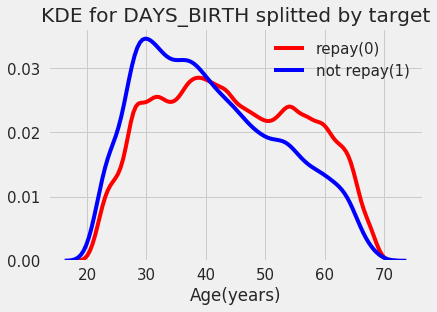

In [72]:
temp_col = 'DAYS_BIRTH'
sns.kdeplot((application_train_int.loc[application_train_int['TARGET'] == 0, temp_col]/365).abs(), label='repay(0)', color='r')
sns.kdeplot((application_train_int.loc[application_train_int['TARGET'] == 1, temp_col]/365).abs(), label='not repay(1)', color='b')
plt.xlabel('Age(years)')
plt.title('KDE for {} splitted by target'.format(temp_col))
plt.show()

- As you can see, The younger, The higher not-repayment probability.
- The older, The lower not-repayment probability.

### <a id='2_2_18'>2.2.18. linear regression analysis on the high correlated feature combinations</a>

- With lmplot from seaborn, we can draw linear regression plot very easily. Thanks!

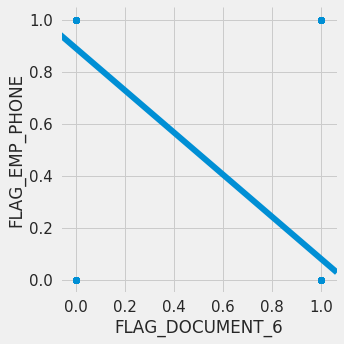

In [73]:
sns.lmplot(x='FLAG_DOCUMENT_6', y='FLAG_EMP_PHONE', data=application_train_int)

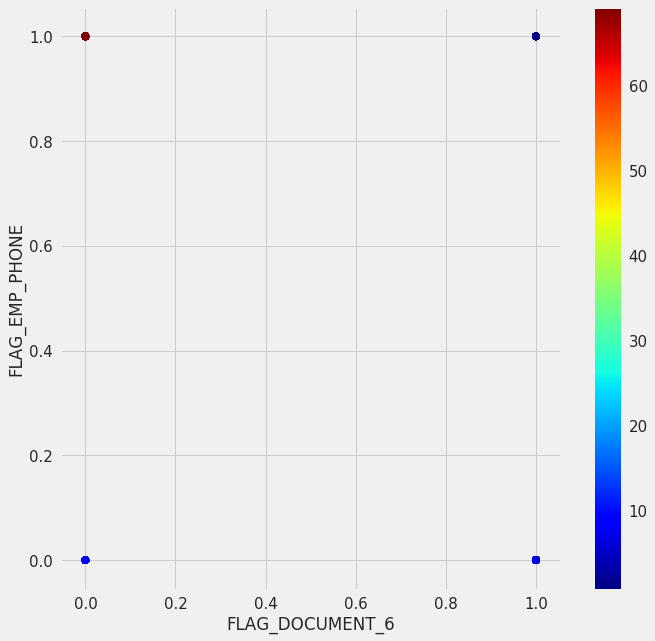

In [74]:
col1 = 'FLAG_DOCUMENT_6'
col2 = 'FLAG_EMP_PHONE'
xy = np.vstack([application_train[col1].dropna().values[:100000], application_train[col2].dropna().values[:100000]])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im = ax.scatter(application_train[col1].dropna().values[:100000], application_train[col2].dropna().values[:100000], c=z, s=50, cmap=plt.cm.jet)
ax.set_xlabel(col1)
ax.set_ylabel(col2)
fig.colorbar(im)

- With gaussian kde density represented by color and linear regression plot, we can see that there are many clients who have EMP Phone and chose document 6.

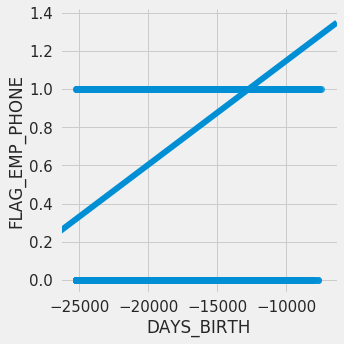

In [75]:
sns.lmplot(x='DAYS_BIRTH', y='FLAG_EMP_PHONE', data=application_train_int)

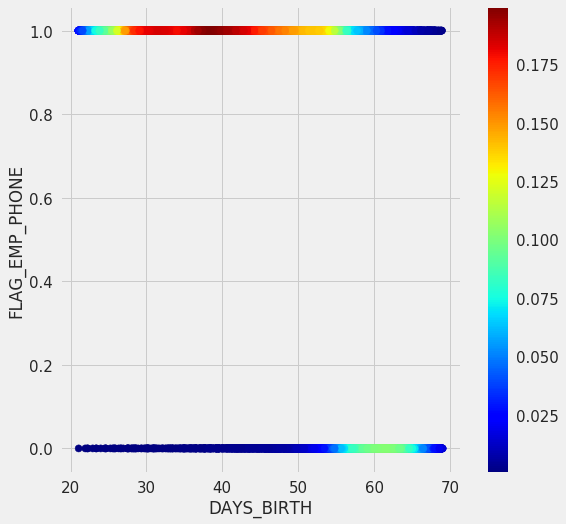

In [76]:
col1 = 'DAYS_BIRTH'
col2 = 'FLAG_EMP_PHONE'
xy = np.vstack([np.abs((application_train[col1].dropna().values[:100000]/365)), application_train[col2].dropna().values[:100000]])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
im = ax.scatter(np.abs((application_train[col1].dropna().values[:100000]/365)), application_train[col2].dropna().values[:100000], c=z, s=50, cmap=plt.cm.jet)
ax.set_xlabel(col1)
ax.set_ylabel(col2)
fig.colorbar(im)

- With gaussian kde density represented by color and linear regression plot, we can see that the younger people tend to have EMP phone.